# Support Vector Machines - Part 2

## Overview
- [1. Review about Primal Support Vector Machine?](#1)
- [2. Dual Support Vector Machine](#2)
- [3. Hard - Soft Margin](#3)
    - [3.1 Implementation](#3.1)
    - [3.2 `Sklearn`](#3.2)
- [3. Kernel SVM](#4)
    - [3.1 Implementation](#4.1)
    - [3.2 `Sklearn`](#4.2)
- [5. Visualization](#5)
- [6. References](#8)

<a name='1' ></a>
## 1. Review about Primal Support Vector Machine
In the past notebook, we discussed about SVMs and the way how to solve it by Gradient Descent method. Now, we have a new approach through Lagrange Method. 

**Primal Support Vector Machine:** Assume we have a dataset that is linearly seperable with each pair of point, $(x^{(1)}, y_1), (x^{(2)}, y_2), (x^{(3)}, y_3), ..., (x^{(n)}, y_n)$, where $n$ is the number of observations, $x^{(i)} = (x_1, x_2, ..., x_d)$ and $d$ is the number of features of $i^{th}$ observation. We need to find the optimal hyperplane with the **largest margin**  to separate datasets into two parts (one positive, one negative). Let example $\mathbf{x} \in \mathbb{R}^d$ be an element of the data space. Consider a function

$$
f: \mathbb{R}^d \rightarrow \mathbb{R} \\
\mathbf{x} \mapsto f(\mathbf{x}) := \mathbf{w^T x} + b = \langle \mathbf{w, x} \rangle + b
$$

parametrized by $\mathbf{w} \in \mathbb{R}^d$ and $b \in \mathbb{R}$. In the other words, we will optimize the objecive function with some constraints

$$\min_{\mathbf{w}, b, \mathbf{\xi}} \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C\sum_{i=1}^n \xi_i$$

subject to 
- $y_i (\mathbf{w^T x^{(i)}} + b) \geq 1 - \xi_i$
- $\xi_i \geq 0$

for all $i=1, 2, ..., n$

<a name='2' ></a>
## 2. Dual Support Vector Machine

From an optimization problem with constraints, we can convert to a dual problem through [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier)

$$\mathcal{L}(\mathbf{w}, b, \xi, \alpha, \gamma) = \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C\sum_{i=1}^n \xi_i - \underbrace{\sum_{i=1}^{n} \alpha_i \left( y_i (\mathbf{w^T x^{(i)}} + b) - 1 + \xi_i\right)}_\text{first constraint}  - \underbrace{\sum_{i=1}^n \gamma_i \xi_i}_\text{second constraint}$$

where $\alpha_i, \gamma_i \geq 0 \forall i=1,...,n$. By differentiating the Lagrangian with respect to the three primal variables $\mathbf{w} , b$ and and $\xi$ respectively, we obtain

\begin{align*}
    \frac{\partial \mathcal{L}}{\partial \mathbf{w}} &= \mathbf{w}^T - \sum_{i=1}^{n} \alpha_i y_i (\mathbf{x^{(i)}})^T \\
    \frac{\partial \mathcal{L}}{\partial b} &= - \sum_{i=1}^n \alpha_i y_i\\
    \frac{\partial \mathcal{L}}{\partial \xi_i} &= C - \alpha_i - \gamma_i
\end{align*}

We now find the maximum of the Lagrangian by setting each of these
partial derivatives to zero. We find

\begin{align*}
    \mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x^{(i)}} \\
    \sum_{i=1}^n \alpha_i y_i = 0 \forall i \\
\end{align*}

By substituting the expression for $\mathbf{w}$ into the Lagrangian, we obtain the dual

$$\mathcal{D}(\mathbf{w}, b, \xi) = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^{n} y_i y_j \alpha_i \alpha_j \mathbf{x^{(i)}} \mathbf{x^{(j)}} + C\sum_{i=1}^n \xi_i - \sum_{i=1}^{n} \alpha_i y_i \left( \sum_{j=1}^{n} \alpha_j y_j \mathbf{x^{(j)}}\right) \mathbf{x^{(i)}} - b \sum_{i=1}^{n} \alpha_i y_i + \sum_{i=1}^n \alpha_i - \sum_{i=1}^{n} \alpha_i \xi_i - \sum_{i=1}^{n} \gamma_i \xi_i$$

Due to $\sum_{i=1}^n \alpha_i y_i = 0$, 

\begin{align*}
\mathcal{D}(\mathbf{w}, b, \xi) &= -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^{n} y_i y_j \alpha_i \alpha_j \mathbf{x^{(i)}} \mathbf{x^{(j)}} + C\sum_{i=1}^n \xi_i + \sum_{i=1}^n \alpha_i - \sum_{i=1}^{n} \alpha_i \xi_i - \sum_{i=1}^{n} \gamma_i \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^{n} y_i y_j \alpha_i \alpha_j \mathbf{x^{(i)}} \mathbf{x^{(j)}} + \sum_{i=1}^n \alpha_i + \sum_{i=1}^n (C - \alpha_i - \gamma_i) \xi_i
\end{align*}

Moreover, by setting $\frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \gamma_i = 0$, using the same equation and recalling that the Lagrange multiplers $\gamma_i$ are non-negative, we conclude that $\alpha_i \leq C$. We now obtain the dual optimization problem of the SVM, which is expressed exclusively in terms of the Lagrange multipliers $\alpha_i$. Recall from Lagrangian duality that we maximize the dual problem.
This is equivalent to minimizing the negative dual problem, such that we end up with the *dual SVM*

\begin{align*}
        &\min_{\mathbf{\alpha}} \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^{n} y_i y_j \alpha_i \alpha_j \mathbf{x^{(i)}} \mathbf{x^{(j)}} - \sum_{i=1}^n \alpha_i \\
        &\text{subject to} \\
        &\sum_{i=1}^n \alpha_i y_i = 0 \\
        &0 \leq \alpha_i \leq C \text{ for } i = 1, 2, ..., n
\end{align*}

<a name='3' ></a>
## 3. Hard - Soft Margin
The hard margin and soft margin problems are both convex quadratic optimization
problems with linear constraints. Such problems are known as *Quadratic Programming (QP)* problems. Many off-the-shelf solvers are available to solve QP problems using a variety of techniques. In this notebook, we will [cvxopt](https://cvxopt.org/examples/tutorial/qp.html) to do it ([more detail at here](https://buildmedia.readthedocs.org/media/pdf/cvxopt/dev/cvxopt.pdf)). 

Vectorize the end formular, we have 

\begin{align*}
        &\min_{\mathbf{\alpha}} \frac{1}{2} \alpha^T \mathbf{Q} \alpha - e^T \alpha \\
        &\text{subject to} \\
        &\mathbf{y}^T \mathbf{\alpha} = 0 \\
        &\begin{bmatrix} \mathbf{G_1} \\ \mathbf{G_2} \end{bmatrix} \leq \begin{bmatrix} \mathbf{0} \\ \mathbf{C} \end{bmatrix}
\end{align*}

where 
- $e$ is the vector of all ones
- $\mathbf{Q}$ is an $n$ by $n$ positive semidefinite matrix, where $Q_{ij} \equiv y_i y_j \mathbf{x^{(i)} x^{(j)}}$ or 
$$\mathbf{Q} = \mathbf{V V^T} $$
where $\mathbf{V} = \begin{bmatrix} y_1 \mathbf{x}^{(1)} & y_2 \mathbf{x}^{(2)} & \cdots & y_n \mathbf{x}^{(n)} \end{bmatrix}^T$.
- $\alpha = \begin{bmatrix} \alpha_1 & \alpha_2 & \cdots & \alpha_n \end{bmatrix}^T$
- $\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}^T$
- $\mathbf{0}$ is the vector of all zeros
- $\mathbf{C}$ is the vector of all $C$

After using `cvxopt` package to find $\alpha$, we will get

\begin{align*}
    \mathbf{w} = \sum_{i \in S} \alpha_i y_i \mathbf{x^{(i)}} = \alpha^T_S \mathbf{V_S} \\
    b = \frac{1}{n_S} \sum_{i \in S} (y_i - \hat{\mathbf{w}} \mathbf{x}^{(i)})
\end{align*}
where $S = \{ \alpha_i: \alpha_i > 0 \}$. We only need to sum over the **support vectors** (i.e. the samples that lie within the margin) because the dual coefficients $\alpha_i$ are zero for the other samples.

<a name='3.1' ></a>
### 3.1 Implementation

In [1]:
# Package
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from cvxopt import matrix, solvers
from utils import visualize_svm

In [2]:
class OwnSVM:
    """Support Vector Machine for classification from scratch."""
    
    def __init__(self, C=1.0, tol=1e-3):
        self.C = C
        self.tol = tol    # alpha_i < tol means alpha_i == 0
        self.n_samples = None
        self.w_ = None
        self.w = None     # don't worry, w is transpose of self.w_
        self.b = None
        self.support_vectors_ = None
        
    def fit(self, X, y):
        """Training model to find the optimal hyperplane."""
        # Use cvxopt to solve 
        self.n_samples = len(y)
        V = np.array([X[i] * y[i] for i in range(self.n_samples)])
        Q = matrix(np.dot(V, V.T))
        e = matrix(-np.ones((self.n_samples, 1)))
        
        # Constraint [G1, G2].T <= [0, C].T
        G1 = -np.eye(self.n_samples)
        G2 = np.eye(self.n_samples)
        G = matrix(np.vstack((G1, G2)))
        h1 = np.zeros((self.n_samples, 1))
        h2 = self.C * np.ones((self.n_samples, 1))
        h = matrix(np.vstack((h1, h2)))
        # Constraint y.T alpha = 0
        yT = np.reshape(y, (1, self.n_samples))
        A = matrix(yT, tc='d') 
        b = matrix(np.zeros((1, 1)))
        
        # Solve
        solvers.options['show_progress'] = False
        solution = solvers.qp(Q, e, G, h, A, b)
        alpha = np.array(solution['x'])
        
        # We only consider 0 < alpha_i < C, because
        # alpha_i = 0 is meaningless when finding w
        S = np.intersect1d(np.where(alpha > self.tol)[0], 
                           np.where(alpha <= self.C)[0])
        S = S[np.lexsort((S, y[S]))]    # sort indices to label -1, 1
        self.support_vectors_ = X[S, :]
        VS = V[S, :]
        alphaS = alpha[S]
        self.w_ = alphaS.T @ VS
        self.b = np.mean(y[S] - self.support_vectors_ @ self.w_.T)
        # Get self.w to visualize hyperplane later
        self.w = np.squeeze(self.w_.T)
        
    def predict(self, X):
        """Predict label for given input X."""
        y_pred = np.sign(np.dot(X, self.w_.T) + self.b)
        return np.squeeze(y_pred)

In [3]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

SVM = OwnSVM()
SVM.fit(X, y)

In [4]:
SVM.support_vectors_

array([[ 0.56085542, -8.37942864],
       [ 4.80039023, -6.81280209],
       [ 3.72312513, -4.92573404]])

<a name='3.2' ></a>
### 3.2 `Sklearn`

In [5]:
from sklearn.svm import SVC 

clf = SVC(kernel='linear', random_state=365)
clf.fit(X, y)
clf.support_vectors_

array([[ 0.56085542, -8.37942864],
       [ 4.80039023, -6.81280209],
       [ 3.72312513, -4.92573404]])

In [6]:
# Check
(SVM.support_vectors_ == clf.support_vectors_).all()

True

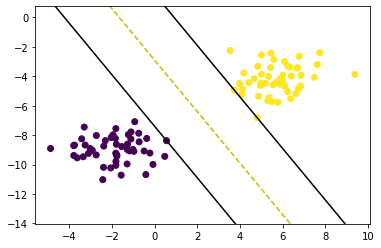

In [7]:
# Visualization
visualize_svm(X, y, SVM)

**Conclusion:** As you saw, we get the same results about *support vectors* in the both of two model (self-built and sklearn). 

**Note:** You can change parameter `cluster_std = 2.05` when initializing dataset to see our model in *soft margin* case.

<a name='4' ></a>
## 4. Kernel SVM

Although easily interpretable, linear classifiers are of limited value. They are simply too restrictive for data embedded in a high-dimensional space and which may have the structured separation. To build more sophisticated classification curves, the feature space for SVM must be enriched. SVM does this by included nonlinear features and then building hyperplanes in this new space. To do this, one simply maps the data into a nonlinear, higher-
dimensional space

$$\mathbf{x} \mapsto \phi(\mathbf{x})$$

A new problem is

$$
f: \mathbb{R}^d \rightarrow \mathbb{R} \\
\mathbf{x} \mapsto f(\mathbf{x}) := \mathbf{w^T}\phi(\mathbf{x}) + b = \langle \mathbf{w}, \phi(\mathbf{x}) \rangle + b
$$

parametrized by $\mathbf{w} \in \mathbb{R}^d$ and $b \in \mathbb{R}$. By constructing similarly, we need to optimize

\begin{align*}
        &\min_{\mathbf{\alpha}} \frac{1}{2} \alpha^T \mathbf{Q} \alpha - e^T \alpha \\
        &\text{subject to} \\
        &\mathbf{y}^T \mathbf{\alpha} = 0 \\
        &\begin{bmatrix} \mathbf{G_1} \\ \mathbf{G_2} \end{bmatrix} \leq \begin{bmatrix} \mathbf{0} \\ \mathbf{C} \end{bmatrix}
\end{align*}

where 
- $e$ is the vector of all ones
- $\mathbf{Q}$ is an $n$ by $n$ positive semidefinite matrix, where $Q_{ij} \equiv y_i y_j K(\mathbf{x^{(i)}}, \mathbf{x^{(j)}})$, where $K(\mathbf{x^{(i)}}, \mathbf{x^{(j)}}) = \phi (\mathbf{x^{(i)}})^T \phi (\mathbf{x^{(j)}})$ 

- $\alpha = \begin{bmatrix} \alpha_1 & \alpha_2 & \cdots & \alpha_n \end{bmatrix}^T$
- $\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}^T$
- $\mathbf{0}$ is the vector of all zeros
- $\mathbf{C}$ is the vector of all $C$

Once the optimization problem is solved, the output of decision_function for a given sample $\mathbf{x}$  becomes:

$$\sum_{i\in S} y_i \alpha_i K(\mathbf{x}^{(i)}, \mathbf{x}) + b,$$

where
$$b = \frac{1}{n_S} \sum_{i\in S} (y_i - \sum_{j\in S} \alpha_j y_j \phi(\mathbf{x}^{(j)})^T \phi(\mathbf{x}^{(i)}) = \frac{1}{n_S} \sum_{i\in S} \left( y_i - \sum_{j\in S} \alpha_j y_j K(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) \right)$$

$S$ is a set of all supprt vectors. 

#### Some Kernel Functions 

\begin{align*}
    \text{Linear: } &K(\mathbf{a, b}) = \mathbf{a}^T\mathbf{b} \\
    \text{Polynomial: } &K(\mathbf{a, b}) = (\gamma\mathbf{a}^T\mathbf{b} + \tau)^d \\
    \text{Gaussian RBF: } &K(\mathbf{a, b}) = \exp(-\gamma \Vert \mathbf{a} - \mathbf{b} \Vert^2)
\end{align*}

where $d$ is the degree of polynomials to be considered, which is exceptionally large to evaluate without using the kernel trick, and $\gamma$ is the width of the Gaussian kernel measuring the distance between individual data points $\mathbf{x}^{(i)}$ and the classification line, $\tau$ is bias of the polynomial.

<a name='4.1' ></a>
### 4.1 Implementation

In [8]:
class KernelSVM:
    """Kernel Support Vector Machine for classification from scratch."""
    
    def __init__(self, C=1.0, tol=1e-3, kernel='rbf', degree=3, coef0=0):
        self.C = C
        self.tol = tol    # alpha_i < tol means alpha_i == 0
        self.kernel_type = kernel
        self.degree = degree
        self.coef0 = coef0
        self.n_samples = None
        self.n_features = None
        self.b = None
        self.support_ = None     # indices of support vectors
        self.support_vectors_ = None
        self.n_support_ = None
        self.dual_coef_ = None     # alpha_i * y_i
        self.gamma = None
        
    def kernel_rbf(self, a, b):
        """Kernel: Gaussian Radial Bias Function."""
        return np.exp(- self.gamma * np.sum((a - b)**2))
    
    def kernel_poly(self, a, b):
        """Kernel: Polynomial."""
        return (self.gamma * np.dot(a.T, b) + self.coef0)**self.degree
    
    def kernel(self, a, b):
        """Get kernel for model."""
        if self.kernel_type == 'rbf':
            return self.kernel_rbf(a, b)
        else:
            return self.kernel_poly(a, b)
    
    def get_Q(self):
        """Get matrix Q to solve by cvxopt."""
        Q = np.array(
            [y[i] * y[j] * self.kernel(X[i], X[j])
             for i in range(self.n_samples)
             for j in range(self.n_samples)]
        )
        Q = np.reshape(Q, (self.n_samples, self.n_samples))
        return Q
    
    def get_K(self, X, alpha):
        """Get matrix K to find intercept b."""
        K = np.array(
            [alpha[j] * y[j] * self.kernel(X[i], X[j])
             for i in self.support_ for j in self.support_]
        )
        K = np.reshape(K, (len(self.support_), len(self.support_)))
        return K
        
    def fit(self, X, y):
        """Training model to find the optimal hyperplane."""
        # Use cvxopt to solve 
        self.n_samples, self.n_features = X.shape
        self.gamma = 1 / (self.n_features * X.var())
        Q = self.get_Q()
        Q_ = matrix(Q)
        e = matrix(-np.ones((self.n_samples, 1)))
        
        # Constraint [G1, G2].T <= [0, C].T
        G1 = -np.eye(self.n_samples)
        G2 = np.eye(self.n_samples)
        G = matrix(np.vstack((G1, G2)))
        h1 = np.zeros((self.n_samples, 1))
        h2 = self.C * np.ones((self.n_samples, 1))
        h = matrix(np.vstack((h1, h2)))
        # Constraint y.T alpha = 0
        yT = np.reshape(y, (1, self.n_samples))
        A = matrix(yT, tc='d') 
        b = matrix(np.zeros((1, 1)))
        
        # Solve
        solvers.options['show_progress'] = False
        solution = solvers.qp(Q_, e, G, h, A, b)
        alpha = np.array(solution['x'])
        
        # We only consider 0 < alpha_i < C, because
        # alpha_i = 0 is meaningless when finding w
        self.support_ = np.intersect1d(np.where(alpha > self.tol)[0], 
                                       np.where(alpha <= self.C)[0])
        # sort indices of support vectors by label -1 and 1 
        self.support_ = self.support_[np.lexsort((self.support_, y[self.support_]))]  
        self.n_support_ = len(self.support_)
        self.support_vectors_ = X[self.support_, :]
        self.dual_coef_ = np.squeeze(alpha[self.support_]) * y[self.support_]
        # Note: K is a matrix of ALL K(xi, xj), not ONLY K(xi, xj)
        K = self.get_K(X, alpha)
        self.b = np.mean(y[self.support_] - np.sum(K, axis=1))
        
    def predict(self, X):
        """Predict label for given input X."""
        y_pred = []
        for idx in range(len(X)):
            pred = np.sum([self.dual_coef_[i] * self.kernel(self.support_vectors_[i, :], X[idx])
                   for i in range(self.n_support_)]) + self.b
            if pred > 0:
                y_pred.append(1)     # assign label 1
            else:
                y_pred.append(-1)     # assign label -1
            
        return np.squeeze(y_pred)

In [9]:
# Re-innitialize dataset
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.05, random_state=40)
y = np.where(y == 0, -1, 1)

kernelSVM = KernelSVM(kernel='rbf')
kernelSVM.fit(X, y)

In [10]:
kernelSVM.support_vectors_

array([[  2.3307997 , -14.08601002],
       [  4.90261856, -10.49881615],
       [ -1.74949274,  -5.01112762],
       [  2.44788986,  -6.96169899],
       [ -0.15962652,  -8.07919446],
       [  0.32005488,  -5.67329915],
       [  3.30149138, -12.0848505 ],
       [  1.42165665,  -7.62443426],
       [ -0.05200041,  -6.19268427],
       [  0.29408527,  -7.06767963],
       [  5.14583611,  -7.40180853],
       [  1.3635843 ,  -5.92990795],
       [  0.82043233,  -3.64814622],
       [  2.88331222,  -9.84238489],
       [  2.09438636,  -9.43164643],
       [-10.63329294,  -8.94063521],
       [ -2.12769076,  -6.23696527],
       [  4.39838005,  -8.34010518],
       [  3.41771132,  -5.32904937],
       [  3.14690528,  -7.48401859],
       [  4.57644761,  -7.68865328],
       [  1.79771357,  -4.76271461],
       [  2.5606395 ,  -4.00586085],
       [  4.987045  ,  -8.50829689],
       [  5.81216675,  -8.64095664],
       [  0.56794159,  -4.92602098],
       [ 16.25491683,  -3.16290966],
 

<a name='4.2' ></a>
### 4.2 `Sklearn`

In [11]:
# sklearn model
clf = SVC(kernel='rbf')
clf.fit(X, y)
clf.support_vectors_

array([[  2.3307997 , -14.08601002],
       [  4.90261856, -10.49881615],
       [ -1.74949274,  -5.01112762],
       [  2.44788986,  -6.96169899],
       [ -0.15962652,  -8.07919446],
       [  0.32005488,  -5.67329915],
       [  3.30149138, -12.0848505 ],
       [  1.42165665,  -7.62443426],
       [ -0.05200041,  -6.19268427],
       [  0.29408527,  -7.06767963],
       [  5.14583611,  -7.40180853],
       [  1.3635843 ,  -5.92990795],
       [  0.82043233,  -3.64814622],
       [  2.88331222,  -9.84238489],
       [  2.09438636,  -9.43164643],
       [-10.63329294,  -8.94063521],
       [ -2.12769076,  -6.23696527],
       [  4.39838005,  -8.34010518],
       [  3.41771132,  -5.32904937],
       [  3.14690528,  -7.48401859],
       [  4.57644761,  -7.68865328],
       [  1.79771357,  -4.76271461],
       [  2.5606395 ,  -4.00586085],
       [  4.987045  ,  -8.50829689],
       [  5.81216675,  -8.64095664],
       [  0.56794159,  -4.92602098],
       [ 16.25491683,  -3.16290966],
 

In [12]:
# Check
(kernelSVM.support_vectors_ == clf.support_vectors_).all()

True

<a name='5' ></a>
## 5. Visualization

In [13]:
def plot_kernel(X, y, clf, title, h=0.2):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

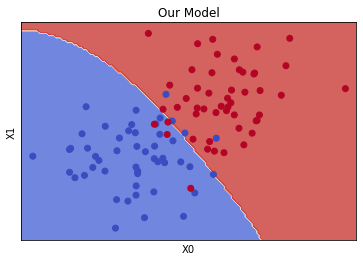

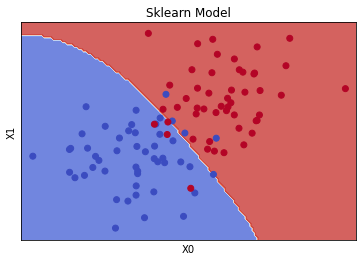

In [14]:
# Plot
model_lst = [kernelSVM, clf]
titles = ['Our Model', 'Sklearn Model']
for model, title in zip(model_lst, titles):
    plot_kernel(X, y, model, title)

<a name='6' ></a>
## 6. References

- [https://en.wikipedia.org/wiki/Support_vector_machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [https://machinelearningcoban.com/2017/04/13/softmarginsmv/](https://machinelearningcoban.com/2017/04/13/softmarginsmv/)
- [https://machinelearningcoban.com/2017/04/22/kernelsmv/](https://machinelearningcoban.com/2017/04/22/kernelsmv/)
- [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)
- [Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow (Page 177-189)](https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)
- [https://www.python-engineer.com/courses/mlfromscratch/07_svm/](https://www.python-engineer.com/courses/mlfromscratch/07_svm/)
- [https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)
- [https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html)
- [https://cvxopt.org/examples/tutorial/qp.html](https://cvxopt.org/examples/tutorial/qp.html)
- [https://buildmedia.readthedocs.org/media/pdf/cvxopt/dev/cvxopt.pdf](https://buildmedia.readthedocs.org/media/pdf/cvxopt/dev/cvxopt.pdf)